**<font size=5> 天猫双十一美妆销售数据分析报告**<br>数据来源于互联网

## 一、读取数据

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('beautymakeup in T-mall.csv')

- update_time:统计时间
- id:产品编码
- title:产品名称
- price:交易价格
- sale_count:销量
- comment_count:评论数量
- 店名:店铺名称

In [3]:
data.shape

(27598, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27598 entries, 0 to 27597
Data columns (total 7 columns):
update_time      27598 non-null object
id               27598 non-null object
title            27598 non-null object
price            27598 non-null float64
sale_count       25244 non-null float64
comment_count    25244 non-null float64
店名               27598 non-null object
dtypes: float64(3), object(4)
memory usage: 1.5+ MB


- 查看各字段信息

In [5]:
data['店名'].value_counts()

悦诗风吟    3021
佰草集     2265
欧莱雅     1974
雅诗兰黛    1810
倩碧      1704
美加净     1678
欧珀莱     1359
妮维雅     1329
相宜本草    1313
兰蔻      1285
娇兰      1193
自然堂     1190
玉兰油     1135
兰芝      1091
美宝莲      825
资生堂      821
植村秀      750
薇姿       746
雅漾       663
雪花秀      543
SKII     469
蜜丝佛陀     434
Name: 店名, dtype: int64

## 二、数据清洗

In [6]:
#对重复数据做删除处理
data =  data.drop_duplicates(inplace=False)

In [7]:
data.shape

(27512, 7)

In [8]:
#索引重置
data.reset_index(inplace = True,drop = True)

In [9]:
#查看缺失值
data.isnull().any()

update_time      False
id               False
title            False
price            False
sale_count        True
comment_count     True
店名               False
dtype: bool

- 有两列数据存在缺失值:sale_count, comment_count

In [10]:
#查看数据结构
data.describe()

,price,sale_count,comment_count
count,27512.000000,2.516200e+04,25162.000000
mean,363.423512,1.231605e+04,1121.741197
std,614.876153,5.241236e+04,5277.781581
min,1.000000,0.000000e+00,0.000000
25%,99.000000,2.780000e+02,21.000000
50%,205.000000,1.443000e+03,153.000000
75%,390.000000,6.353000e+03,669.000000
max,11100.000000,1.923160e+06,202930.000000


In [11]:
#查看sale_count列的众数
mode_01 = data.sale_count.mode()
mode_01

0    0.0
dtype: float64

In [12]:
#查看comment_count列的众数
mode_02 = data.comment_count.mode()
mode_02

0    0.0
dtype: float64

- 此处两列的众数均为0，且由标签数据含义可知销售量和评论数有可能存在为0的情况，因此用0来填充缺失值。

In [13]:
data = data.fillna(0)

In [14]:
data.isnull().sum()

update_time      0
id               0
title            0
price            0
sale_count       0
comment_count    0
店名               0
dtype: int64

In [15]:
data.head()

,update_time,id,title,price,sale_count,comment_count,店名
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂
2,2016/11/14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂
3,2016/11/14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂
4,2016/11/14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂


In [16]:
import jieba

In [17]:
title_cut = []
for i in data.title:
    j = jieba.lcut(i)
    title_cut.append(j)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jiaming.li\AppData\Local\Temp\jieba.cache
Loading model cost 0.674 seconds.
Prefix dict has been built successfully.


In [18]:
data['item_name_cut'] = title_cut

In [19]:
data[['title','item_name_cut']].head()

,title,item_name_cut
0,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,..."
1,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡..."
2,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,"[CHANDO, /, 自然, 堂, 活泉, 保湿, 修护, 精华, 水, （, 滋润, 型..."
3,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,"[CHANDO, /, 自然, 堂, , 男士, 劲爽, 控油, 洁面膏, , 100g..."
4,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,"[CHANDO, /, 自然, 堂, 雪域, 精粹, 纯粹, 滋润霜, （, 清爽型, ）,..."


In [20]:
# 给商品添加分类
sub_type = []   #子类别
main_type = []  #主类别
basic_config_data = """护肤品 套装 套装 
护肤品 乳液类 乳液 美白乳 润肤乳 凝乳 柔肤液 亮肤乳 菁华乳 修护乳
护肤品 眼部护理 眼霜 眼部精华 眼膜 
护肤品 面膜类 面膜 
护肤品 清洁类 洗面 洁面 清洁 卸妆 洁颜 洗颜 去角质 磨砂 
护肤品 化妆水 化妆水 爽肤水 柔肤水 补水露 凝露 柔肤液 精粹水 亮肤水 润肤水 保湿水 菁华水 保湿喷雾 舒缓喷雾
护肤品 面霜类 面霜 日霜 晚霜 柔肤霜 滋润霜 保湿霜 凝霜 日间霜 晚间霜 乳霜 修护霜 亮肤霜 底霜 菁华霜
护肤品 精华类 精华液 精华水 精华露 精华素 
护肤品 防晒类 防晒霜 防晒喷雾 
化妆品 口红类 唇釉 口红 唇彩 
化妆品 底妆类 散粉 蜜粉 粉底液 定妆粉  气垫 粉饼 BB CC 遮瑕 粉霜 粉底膏 粉底霜 
化妆品 眼部彩妆 眉粉 染眉膏 眼线 眼影 睫毛膏  
化妆品 修容类 鼻影 修容粉 高光 腮红 
其他 其他 其他"""

In [21]:
category_config_map = {}
for config_line in basic_config_data.split('\n'):
    basic_cateogry_list = config_line.strip().strip('\n').strip('\t').split()
    main_category = basic_cateogry_list[0]
    sub_category = basic_cateogry_list[1]
    unit_category_list = basic_cateogry_list[2:-1]
    for unit_category in unit_category_list:
        if unit_category and unit_category.strip().strip('\t'):
            category_config_map[unit_category] = (main_category,sub_category)

In [22]:
category_config_map

{'乳液': ('护肤品', '乳液类'),
 '美白乳': ('护肤品', '乳液类'),
 '润肤乳': ('护肤品', '乳液类'),
 '凝乳': ('护肤品', '乳液类'),
 '柔肤液': ('护肤品', '化妆水'),
 '亮肤乳': ('护肤品', '乳液类'),
 '菁华乳': ('护肤品', '乳液类'),
 '眼霜': ('护肤品', '眼部护理'),
 '眼部精华': ('护肤品', '眼部护理'),
 '洗面': ('护肤品', '清洁类'),
 '洁面': ('护肤品', '清洁类'),
 '清洁': ('护肤品', '清洁类'),
 '卸妆': ('护肤品', '清洁类'),
 '洁颜': ('护肤品', '清洁类'),
 '洗颜': ('护肤品', '清洁类'),
 '去角质': ('护肤品', '清洁类'),
 '化妆水': ('护肤品', '化妆水'),
 '爽肤水': ('护肤品', '化妆水'),
 '柔肤水': ('护肤品', '化妆水'),
 '补水露': ('护肤品', '化妆水'),
 '凝露': ('护肤品', '化妆水'),
 '精粹水': ('护肤品', '化妆水'),
 '亮肤水': ('护肤品', '化妆水'),
 '润肤水': ('护肤品', '化妆水'),
 '保湿水': ('护肤品', '化妆水'),
 '菁华水': ('护肤品', '化妆水'),
 '保湿喷雾': ('护肤品', '化妆水'),
 '面霜': ('护肤品', '面霜类'),
 '日霜': ('护肤品', '面霜类'),
 '晚霜': ('护肤品', '面霜类'),
 '柔肤霜': ('护肤品', '面霜类'),
 '滋润霜': ('护肤品', '面霜类'),
 '保湿霜': ('护肤品', '面霜类'),
 '凝霜': ('护肤品', '面霜类'),
 '日间霜': ('护肤品', '面霜类'),
 '晚间霜': ('护肤品', '面霜类'),
 '乳霜': ('护肤品', '面霜类'),
 '修护霜': ('护肤品', '面霜类'),
 '亮肤霜': ('护肤品', '面霜类'),
 '底霜': ('护肤品', '面霜类'),
 '精华液': ('护肤品', '精华类'),
 '精华水': ('护肤品', '精华类'),
 '精华

In [23]:
for i in range(len(data)):
    exist = False
    for temp in data.item_name_cut[i]:
        if temp in category_config_map:
            sub_type.append(category_config_map.get(temp)[1])
            main_type.append(category_config_map.get(temp)[0])
            exist = True
            break
    if not exist:
        sub_type.append('其他')
        main_type.append('其他')

In [24]:
print(len(sub_type),len(main_type),len(data))

27512 27512 27512


In [25]:
data['sub_type'] = sub_type

In [26]:
data['main_type'] = main_type

In [27]:
data['sub_type'].value_counts()

其他      13100
清洁类      2922
面霜类      2675
化妆水      1955
底妆类      1790
乳液类      1352
眼部护理     1114
精华类       727
口红类       715
眼部彩妆      604
防晒类       494
修容类        64
Name: sub_type, dtype: int64

In [28]:
data['main_type'].value_counts()

其他     13100
护肤品    11239
化妆品     3173
Name: main_type, dtype: int64

In [29]:
gender = []
for i in range(len(data)):
    if '男' in data.item_name_cut[i]:
        gender.append('是')
    elif '男士' in data.item_name_cut[i]:
        gender.append('是')
    elif '男生' in data.item_name_cut[i]:
        gender.append('是')
    else:
        gender.append('否')

In [30]:
# 将“是否男士专用”新增为一列
data['是否男士专用'] = gender
data['是否男士专用'].value_counts()

否    25310
是     2202
Name: 是否男士专用, dtype: int64

In [31]:
# 转换时间格式
data['update_time'] = pd.to_datetime(data['update_time'])

In [32]:
data['update_time']

0       2016-11-14
1       2016-11-14
2       2016-11-14
3       2016-11-14
4       2016-11-14
5       2016-11-14
6       2016-11-14
7       2016-11-14
8       2016-11-14
9       2016-11-14
10      2016-11-14
11      2016-11-14
12      2016-11-14
13      2016-11-14
14      2016-11-14
15      2016-11-14
16      2016-11-14
17      2016-11-14
18      2016-11-14
19      2016-11-14
20      2016-11-14
21      2016-11-14
22      2016-11-14
23      2016-11-14
24      2016-11-14
25      2016-11-14
26      2016-11-14
27      2016-11-14
28      2016-11-14
29      2016-11-14
           ...    
27482   2016-11-05
27483   2016-11-05
27484   2016-11-05
27485   2016-11-05
27486   2016-11-05
27487   2016-11-05
27488   2016-11-05
27489   2016-11-05
27490   2016-11-05
27491   2016-11-05
27492   2016-11-05
27493   2016-11-05
27494   2016-11-05
27495   2016-11-05
27496   2016-11-05
27497   2016-11-05
27498   2016-11-05
27499   2016-11-05
27500   2016-11-05
27501   2016-11-05
27502   2016-11-05
27503   2016

In [33]:
# 将时间设置为新的index
data = data.set_index('update_time')

In [34]:
# 新增时间“天”为一列
data['day'] = data.index.day

In [35]:
# 删除中文分词的一列
del data['item_name_cut']

In [36]:
data = data.sort_values(by = ['id','day'])

In [37]:
gender1 = []
for i in range(len(data)):
    if data.iloc[i]['id'] == data.iloc[i-1]['id']:
        sale = data.iloc[i]['sale_count'] - data.iloc[i-1]['sale_count']
        if data.iloc[i]['店名'] != '兰蔻':
            gender1.append(sale)
        elif data.iloc[i]['sale_count'] - data.iloc[i-1]['sale_count']<-10:
            gender1.append(data.iloc[i]['sale_count'])
        else:
            gender1.append(sale)
    else:
        gender1.append(0)

In [38]:
#新增一列日销售量
data['sale_count_day'] =  gender1
#新增一列日销售额，销售额=销售量*价格
data['日销售额'] = data.price*data.sale_count_day

In [39]:
data.head()

,id,title,price,sale_count,comment_count,店名,sub_type,main_type,是否男士专用,day,sale_count_day,日销售额
update_time,,,,,,,,,,,,
2016-11-05,A10027317366,【买预售更划算】相宜本草红景天护肤套装美白补水保湿女化妆品,258.0,205288.0,10936.0,相宜本草,其他,其他,否,5,0.0,0.0
2016-11-06,A10027317366,【买预售更划算】相宜本草红景天护肤套装美白补水保湿女化妆品,258.0,205290.0,10767.0,相宜本草,其他,其他,否,6,2.0,516.0
2016-11-07,A10027317366,【买预售更划算】相宜本草红景天护肤套装美白补水保湿女化妆品,258.0,205289.0,10622.0,相宜本草,其他,其他,否,7,-1.0,-258.0
2016-11-08,A10027317366,【真5折狂欢购】相宜本草红景天护肤套装美白补水保湿女化妆品,258.0,205290.0,10483.0,相宜本草,其他,其他,否,8,1.0,258.0
2016-11-09,A10027317366,【真5折狂欢购】相宜本草红景天护肤套装美白补水保湿女化妆品,258.0,205292.0,10321.0,相宜本草,其他,其他,否,9,2.0,516.0


- 查看最终数据表格

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27512 entries, 2016-11-05 to 2016-11-14
Data columns (total 12 columns):
id                27512 non-null object
title             27512 non-null object
price             27512 non-null float64
sale_count        27512 non-null float64
comment_count     27512 non-null float64
店名                27512 non-null object
sub_type          27512 non-null object
main_type         27512 non-null object
是否男士专用            27512 non-null object
day               27512 non-null int64
sale_count_day    27512 non-null float64
日销售额              27512 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 2.7+ MB


In [41]:
# 保存清理好的数据为Excel格式
data.to_excel('clean_beautymakeup.xls',sheet_name='clean_data')

## 三、数据探索

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
data.columns

Index(['id', 'title', 'price', 'sale_count', 'comment_count', '店名', 'sub_type',
       'main_type', '是否男士专用', 'day', 'sale_count_day', '日销售额'],
      dtype='object')

### 3.1 各品牌SKU数

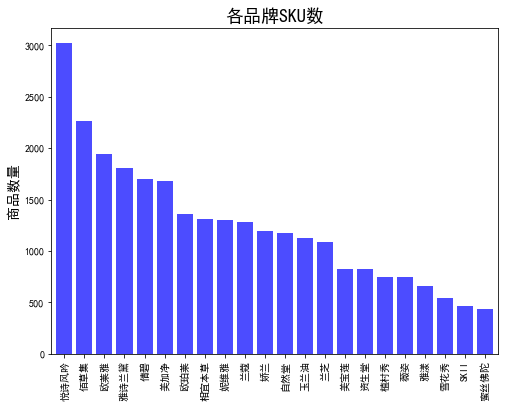

In [44]:
plt.rcParams['font.sans-serif']=['SimHei']  #指定默认字体  
plt.rcParams['axes.unicode_minus']=False  #解决负号'-'显示为方块的问题

plt.figure(figsize=(8,6))
# 计算各店铺的商品数量
data['店名'].value_counts().sort_values(ascending=False).plot.bar(width=0.8,alpha=0.7,color='b')

plt.title('各品牌SKU数',fontsize=18)
plt.ylabel('商品数量',fontsize=14)
plt.show()

- 悦诗风吟的商品数量最多，其次为佰草集、欧莱雅

### 3.2 各品牌双十一期间的总销量和总销售额

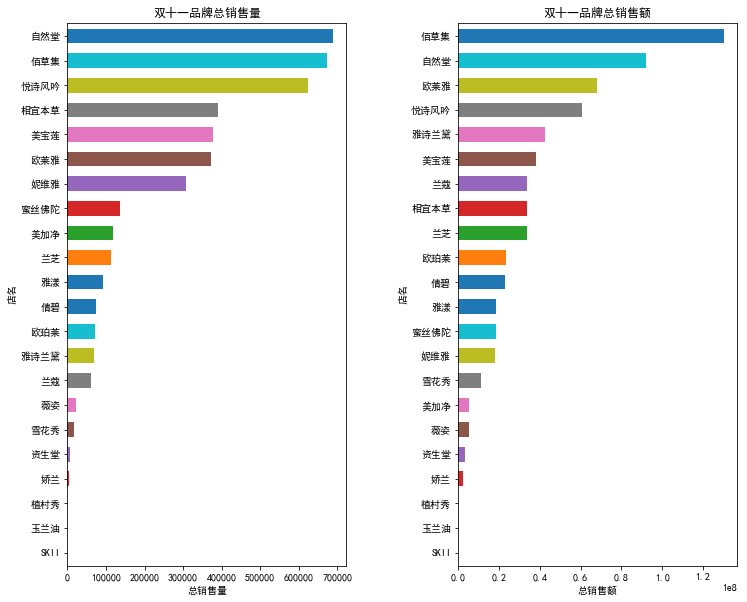

In [45]:
fig,axes = plt.subplots(1,2,figsize=(12,10))

ax1 = data.groupby('店名').sale_count_day.sum().sort_values(ascending=True).plot(kind='barh',ax=axes[0],width=0.6)
ax1.set_title('双十一品牌总销售量',fontsize=12)
ax1.set_xlabel('总销售量')

ax2 = data.groupby('店名')['日销售额'].sum().sort_values(ascending=True).plot(kind='barh',ax=axes[1],width=0.6)
ax2.set_title('双十一品牌总销售额',fontsize=12)
ax2.set_xlabel('总销售额')

plt.subplots_adjust(wspace=0.4)
plt.show()

- 自然堂销量最高，销量第二至第五，分别为佰草集、悦诗风吟、相宜本草、美宝莲；
- 佰草集销售额最高，销售额第二至第五，分别为自然堂、欧莱雅、悦诗风吟、雅诗兰黛。 
- 自然堂、悦诗风吟、佰草集都在销量、销售额前五中。

### 3.3 各类别的销售量、销售额情况

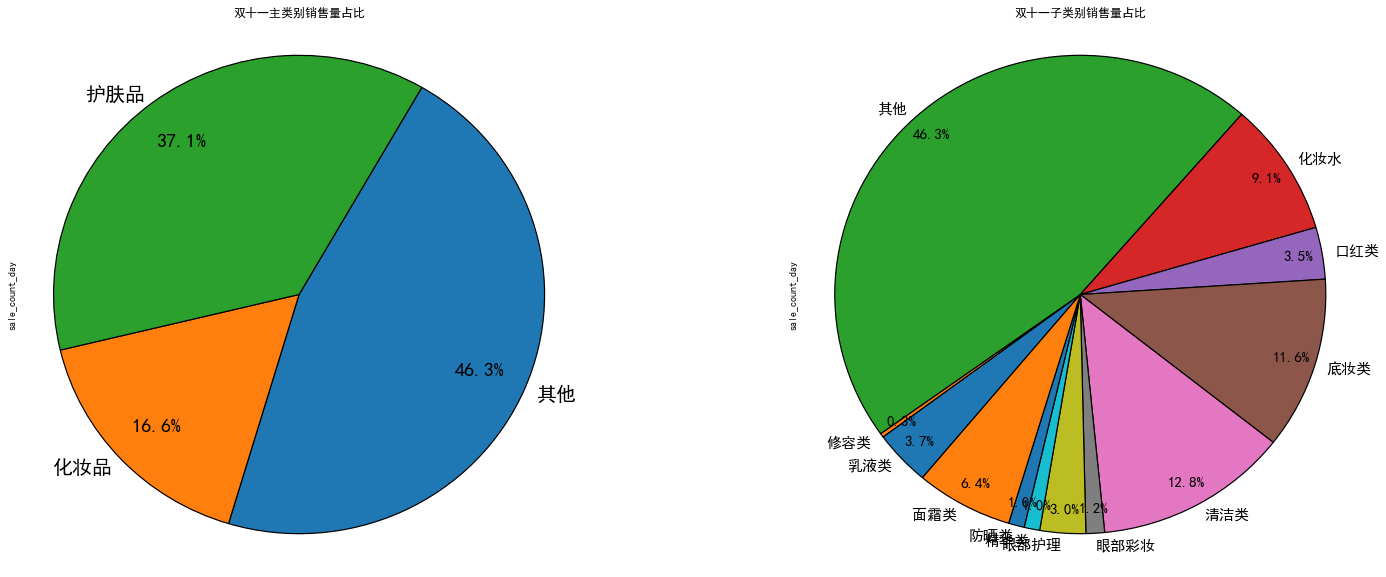

In [46]:
fig,axes = plt.subplots(1,2,figsize=(24,10))

data1 = data.groupby('main_type')['sale_count_day'].sum()
ax1 = data1.plot(kind='pie',ax=axes[0],autopct='%.1f%%', # 设置百分比的格式，这里保留一位小数
pctdistance=0.8, # 设置百分比标签与圆心的距离
labels= data1.index,
labeldistance = 1.05, # 设置标签与圆心的距离
startangle = 60, # 设置饼图的初始角度
radius = 1.1, # 设置饼图的半径
counterclock = False, # 是否逆时针，这里设置为顺时针方向
wedgeprops = {'linewidth': 1.2, 'edgecolor':'k'},# 设置饼图内外边界的属性值
textprops = {'fontsize':20, 'color':'k'}, # 设置文本标签的属性值
)
ax1.set_title('双十一主类别销售量占比',fontsize=12)

data2 = data.groupby('sub_type')['sale_count_day'].sum()
ax2 = data2.plot(kind='pie',ax=axes[1],autopct='%.1f%%', 
pctdistance=0.9, 
labels= data2.index,
labeldistance = 1.05,
startangle = 230, 
radius = 1.1, 
counterclock = False, 
wedgeprops = {'linewidth': 1.2, 'edgecolor':'k'},
textprops = {'fontsize':15, 'color':'k'}, 
)

ax2.set_title('双十一子类别销售量占比',fontsize=12)

plt.subplots_adjust(wspace=0.4)
plt.show()

- 从主类别销售量占比情况来看，护肤品的销量远大于化妆品；
- 从子类别销售量占比情况来看，底妆类、口红类在化妆品中销量最多，清洁类、化妆水、面霜类在护肤品中销量最多。

<function matplotlib.pyplot.show(*args, **kw)>

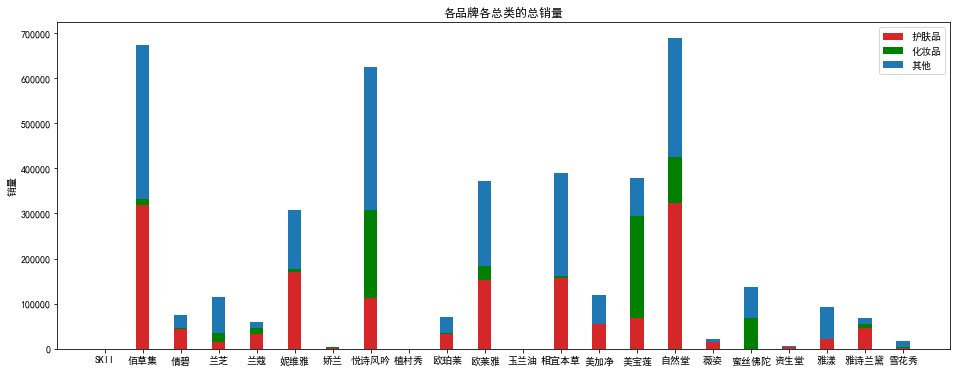

In [47]:

plt.figure(figsize=(16,6))
width = 0.35
sale_count1 = data[data.main_type == '护肤品'].groupby(['店名'])['sale_count_day'].sum().sort_index(ascending=True)
sale_count1['蜜丝佛陀'] = 0
d1 =np.array(sale_count1.sort_index(ascending=True))
sale_count2 = data[data.main_type == '化妆品'].groupby(['店名'])['sale_count_day'].sum().sort_index(ascending=True)
sale_count2['美加净'] = 0
d2 = np.array(sale_count2.sort_index(ascending=True))
d=[]
for i in range(0,len(d1)):
    sum = d1[i] + d2[i]
    d.append(sum)
sale_count3 = data[data.main_type == '其他'].groupby(['店名'])['sale_count_day'].sum().sort_index(ascending=True)
d3 = np.array(sale_count3.values)
ind  = np.arange(len(d1))
p1 = plt.bar(ind,d1,width,color='#d62728')
p2 = plt.bar(ind,d2,width,bottom = d1,color='g')
p3 = plt.bar(ind,d3,width,bottom = d)
plt.ylabel('销量')
plt.title('各品牌各总类的总销量')
plt.xticks(ind, tuple(data.groupby(['店名'])['店名'].sum().sort_index(ascending=True).index))
plt.legend((p1[0], p2[0], p3[0]), ('护肤品', '化妆品', '其他'))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

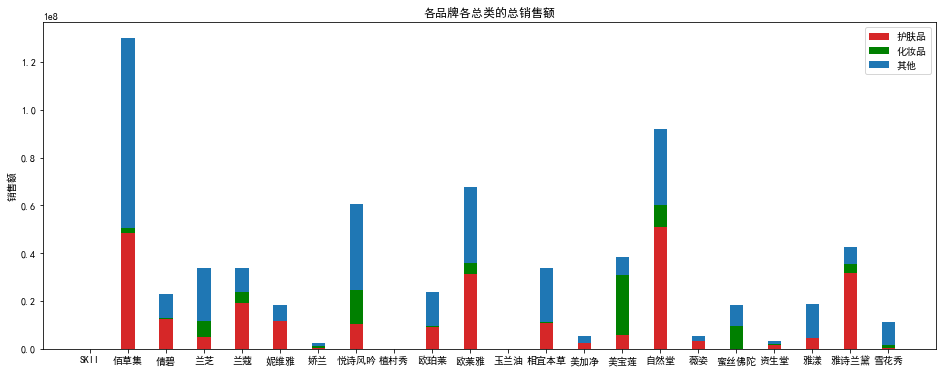

In [48]:
plt.figure(figsize=(16,6))
width = 0.35
sale_sum1 = data[data.main_type == '护肤品'].groupby(['店名'])['日销售额'].sum().sort_index(ascending=True)
sale_sum1['蜜丝佛陀'] = 0
d4 =np.array(sale_sum1.sort_index(ascending=True))
sale_sum2 = data[data.main_type == '化妆品'].groupby(['店名'])['日销售额'].sum().sort_index(ascending=True)
sale_sum2['美加净'] = 0
d5 = np.array(sale_sum2.sort_index(ascending=True))
dd=[]
for i in range(0,len(d4)):
    sum = d4[i] + d5[i]
    dd.append(sum)
sale_sum3 = data[data.main_type == '其他'].groupby(['店名'])['日销售额'].sum().sort_index(ascending=True)
d6 = np.array(sale_sum3.values)
ind  = np.arange(len(d4))
p4 = plt.bar(ind,d4,width,color='#d62728')
p5 = plt.bar(ind,d5,width,bottom = d4,color='g')
p6 = plt.bar(ind,d6,width,bottom = dd)
plt.ylabel('销售额')
plt.title('各品牌各总类的总销售额')
plt.xticks(ind, tuple(data.groupby(['店名'])['店名'].sum().sort_index(ascending=True).index))
plt.legend((p1[0], p2[0], p3[0]), ('护肤品', '化妆品', '其他'))
plt.show

- 各品牌的化妆品、护肤品销量、销售情况均不一样，这与品牌的定位有关， 有的品牌主打化妆品，化妆品会表现好很多，如美宝莲等。主打护肤品的品牌，护肤品的销量销售额会表现好很多，如欧莱雅、佰草集等。 有的品牌如美宝莲、兰蔻、悦诗风吟，化妆品和护肤品的销售、销售额都还不错。

C:\Users\jiaming.li\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


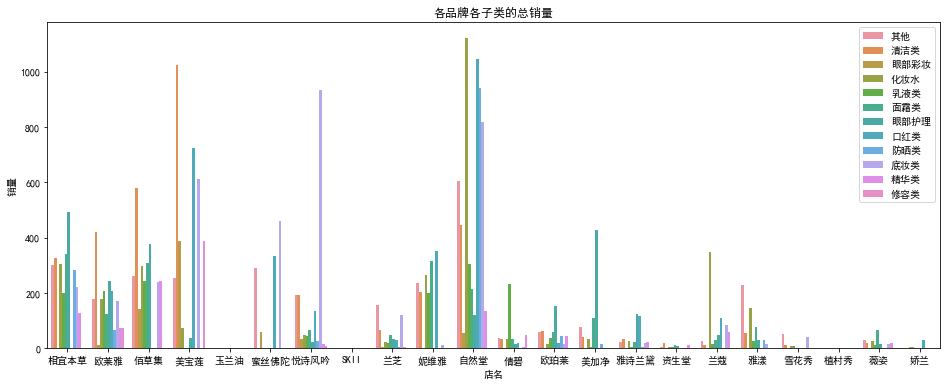

In [49]:
plt.figure(figsize = (16,6))
sns.barplot( x = '店名',
y = 'sale_count_day',hue = 'sub_type',data =data,saturation = 0.75,ci=0)
plt.legend(loc ='upper right' )
plt.title('各品牌各子类的总销量')
plt.ylabel('销量')
plt.show()

C:\Users\jiaming.li\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


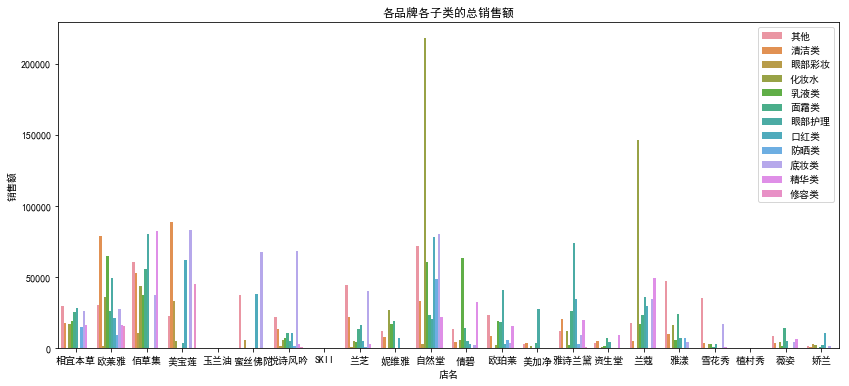

In [50]:
plt.figure(figsize = (14,6))
sns.barplot( x = '店名',
y = '日销售额',hue = 'sub_type',data =data,saturation = 0.75,ci=0)
plt.legend(loc ='upper right' )
plt.title('各品牌各子类的总销售额')
plt.ylabel('销售额')
plt.show()

### 3.4 各品牌热度

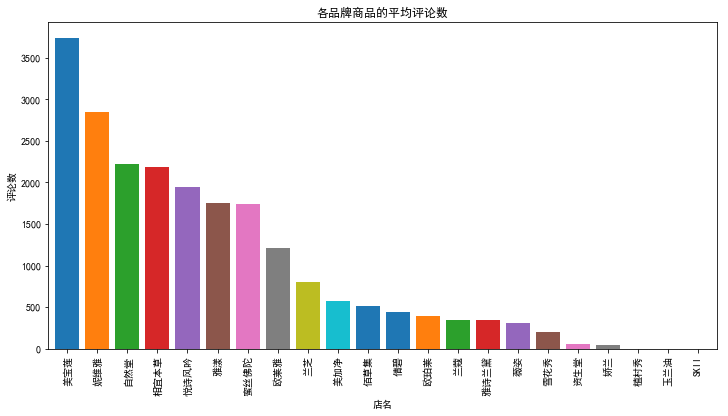

In [51]:
plt.figure(figsize = (12,6))
data.groupby('店名').comment_count.mean().sort_values(ascending=False).plot(kind='bar',width=0.8)
plt.title('各品牌商品的平均评论数')
plt.ylabel('评论数')
plt.show()

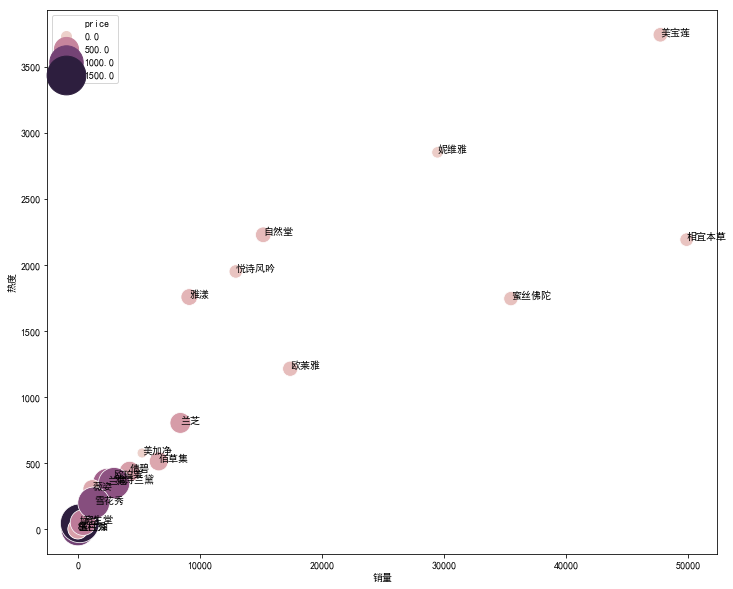

In [52]:
plt.figure(figsize=(12,10))

x = data.groupby('店名')['sale_count'].mean()
y = data.groupby('店名')['comment_count'].mean()
s = data.groupby('店名')['price'].mean()
txt = data.groupby('店名').id.count().index

sns.scatterplot(x,y,size=s,hue=s,sizes=(100,1500),data=data)

for i in range(len(txt)):
    plt.annotate(txt[i],xy=(x[i],y[i]))
    
plt.ylabel('热度')
plt.xlabel('销量')

plt.legend(loc='upper left')
plt.show()

**由上图所示：越靠上的品牌热度越高，越靠右的品牌销量越高，颜色越深圈越大价格越高**
- 热度与销量呈现一定的正相关；
- 美宝莲热度第一，销量第二，妮维雅热度第二，销量第四，两者价格均相对较低；
- 价格低的品牌热度和销量相对较高，价格高的品牌热度和销量相对较低，说明价格在热度和销量中有一定影响；


### 3.5 各品牌价格

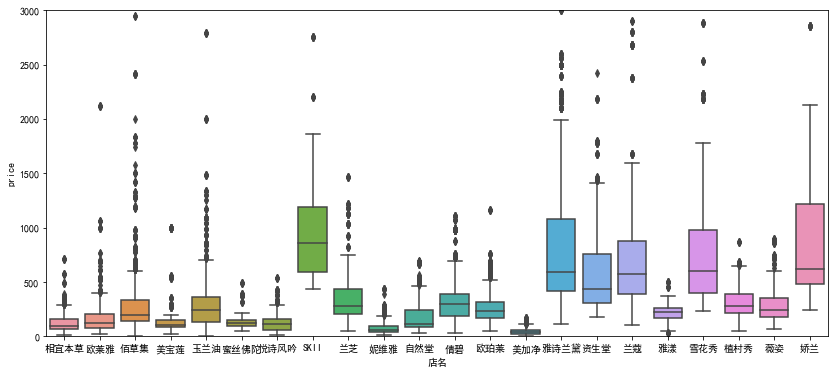

In [53]:
#查看价格的箱型图
plt.figure(figsize=(14,6))
sns.boxplot(x='店名',y='price',data=data)
plt.ylim(0,3000)#如果不限制，就不容易看清箱型，所以把Y轴刻度缩小为0-3000
plt.show()

In [54]:
data.groupby('店名').price.sum()
avg_price=data.groupby('店名').price.sum()/data.groupby('店名').price.count()
avg_price

店名
SKII    1011.727079
佰草集      289.823171
倩碧       346.092190
兰芝       356.615809
兰蔻       756.400778
妮维雅       73.789053
娇兰      1361.043588
悦诗风吟     121.245945
植村秀      311.786667
欧珀莱      276.218543
欧莱雅      167.282698
玉兰油      329.657294
相宜本草     122.958446
美加净       44.694619
美宝莲      148.757576
自然堂      180.130213
薇姿       281.085791
蜜丝佛陀     142.118894
资生堂      577.438490
雅漾       212.618401
雅诗兰黛     872.470718
雪花秀      901.082873
Name: price, dtype: float64

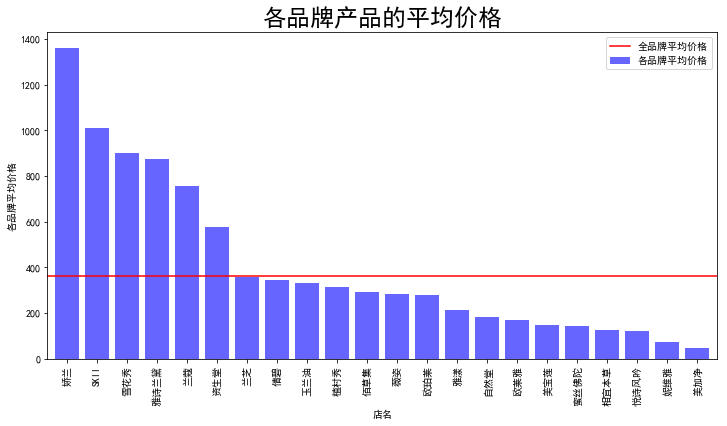

In [55]:
fig = plt.figure(figsize=(12,6))
avg_price.sort_values(ascending=False).plot(kind='bar',width=0.8,alpha=0.6,color='b',label='各品牌平均价格')
y = data['price'].mean()
plt.axhline(y,0,5,color='r',label='全品牌平均价格')
plt.ylabel('各品牌平均价格')
plt.title('各品牌产品的平均价格',fontsize=24)
plt.legend(loc='best')
plt.show()

- 娇兰、SKII、雪花秀、雅诗兰黛、兰蔻、资生堂这几个国际大牌的产品价格很高，产品平均价格都在500以上，都是一线大牌；
- 兰芝、倩碧、玉兰油、植村秀、佰草集、薇姿、雅漾的平均价格在300-400元左右，其中佰草集是最贵的国货品牌；
- 美加净作为国货品牌，性价比高，平均价格最低，妮维雅的平均价格第二低，在100元左右；
- 全品牌平均价格低于400元，除了前五个国际大牌其余品牌的平均价格都低于全品牌平均价格；

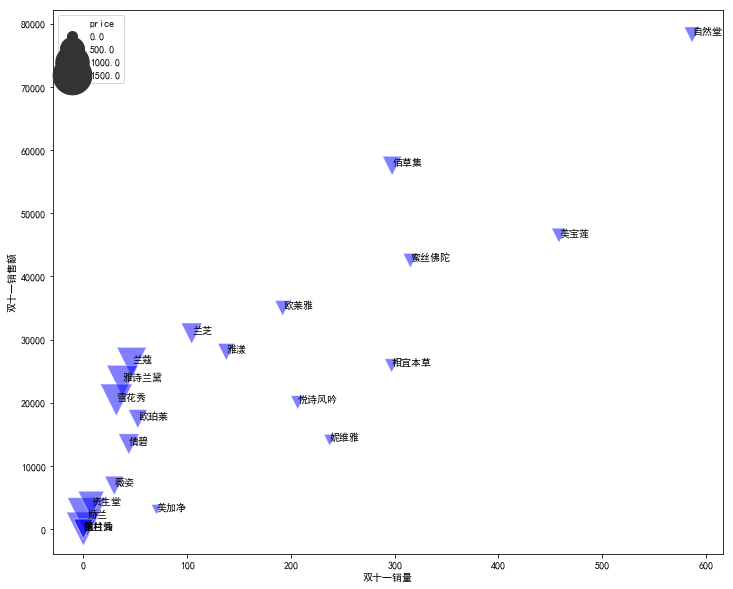

In [56]:
plt.figure(figsize=(12,10))

x = data.groupby('店名')['sale_count_day'].mean()
y = data.groupby('店名')['日销售额'].mean()
s = avg_price
txt = data.groupby('店名').id.count().index

sns.scatterplot(x,y,size=s,sizes=(100,1500),marker='v',alpha=0.5,color='b',data=data)

for i in range(len(txt)):
    plt.annotate(txt[i],xy=(x[i],y[i]),xytext = (x[i]+0.2, y[i]+0.2))  #在散点后面增加品牌信息的标签
    
plt.ylabel('双十一销售额')
plt.xlabel('双十一销量')

plt.legend(loc='upper left')
plt.show()

**由上图所示，越靠上代表销售额越高，越靠左代表销量越高，图形越大代表平均价格越高**
- 销售量和销售额呈现正相关；
- 自然堂、美宝莲销量和销售额位居前二，且平均价格居中；
- 说明销量销售额与价格有很重要的联系；

### 3.6 男性护肤品销量情况

C:\Users\jiaming.li\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


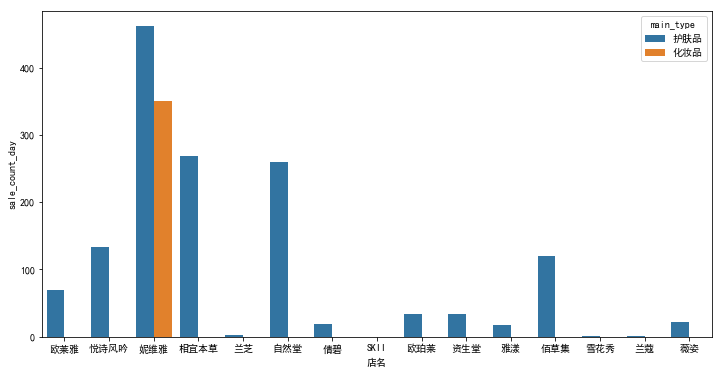

In [57]:
gender_data=data[data['是否男士专用']=='是']
gender_data_1=gender_data[(gender_data.main_type =='护肤品')| (gender_data.main_type=='化妆品')]
plt.figure(figsize = (12,6))
sns.barplot(x='店名',y='sale_count_day',hue='main_type',data =gender_data_1,saturation=0.75,ci=0,)
plt.show()

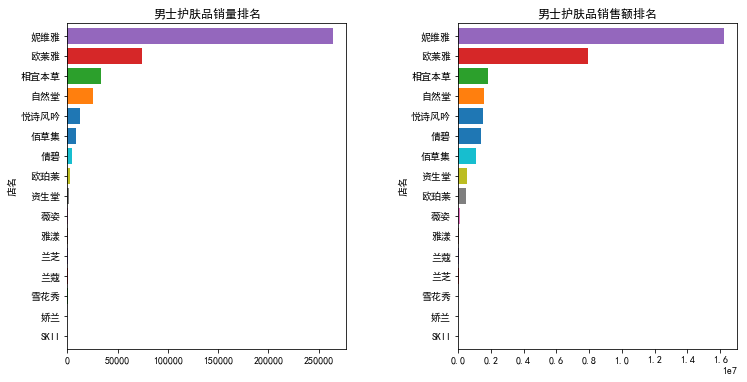

In [58]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
gender_data.groupby('店名').sale_count_day.sum().sort_values(ascending=True).plot(kind='barh',width=0.8,ax=ax1)
ax1.set_title('男士护肤品销量排名')

gender_data.groupby('店名').日销售额.sum().sort_values(ascending=True).plot(kind='barh',width=0.8,ax=ax2)
ax2.set_title('男士护肤品销售额排名')

plt.subplots_adjust(wspace=0.4)
plt.show()

- 男士购买的大多是护肤品；
- 妮维雅是男生护肤品中销量遥遥领先的品牌，第二第三分别为欧莱雅、相宜本草；

### 3.7 分析时间与销量的关系，体现购买高峰期

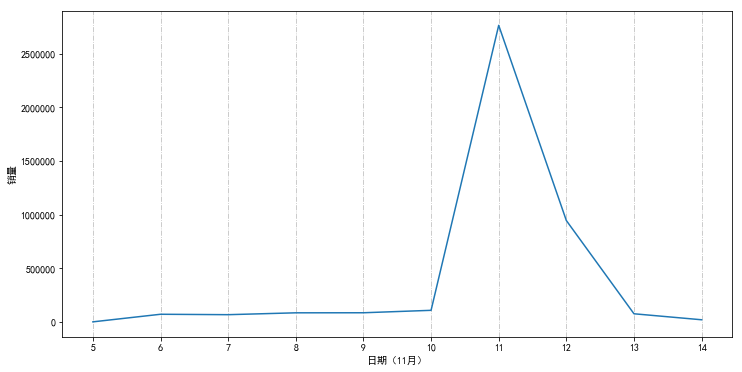

In [59]:
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize = (12,6))
day_sale=data.groupby('day')['sale_count_day'].sum()
day_sale.plot()
plt.grid(linestyle="-.",color="gray",axis="x",alpha=0.5)
x_major_locator=MultipleLocator(1)  #把x轴的刻度间隔设置为1，并存在变量里
ax=plt.gca()  #ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
plt.xlabel('日期（11月）')
plt.ylabel('销量')
plt.show()

- 淘宝化妆品的购买高峰出现在11号当天，说明当天优惠力度大，消费者购买欲望强烈；
- 12号当天销量还维持在高位，说明部分商家的优惠不仅仅在11号当天，还延续到了12号，也可能是消费者的消费预热；
- 销量主要集中在11、12号两天说明打折优惠对销量的促进效果明显

### 总结
- 美妆类别中护肤品销量远大于化妆品，其中清洁类、化妆水、面霜等基础护肤类销量最高；
- 男士购买美妆集中在护肤品类，其中妮维雅品牌是最受男士喜爱的品牌；
- 价格和热度对销售量有关联，平价基础产品是大多数消费者的选择；
- 双十一优惠活动对11号当天销量增长效果明显

### 建议
- 消费者对产品价格和热度关注度较高，品牌可以适当调整产品价格并通过诸如网络社交平台的方式提高品牌热度；
- 对于男性消费者，品牌可以定向推荐平价基础护肤产品，在销量中可以看到也有一部分男性购买化妆品，品牌可以在护肤品中适当捆绑化妆品产品带动消费；
- 消费者购买欲望并不集中在双十一当天，商家可以提前预热加大优惠力度刺激消费者提前消费，或者延长优惠时长，避免网络高峰。